In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('BankChurners.csv')

ATTRITION_FLAG = data.columns[1]

data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


# Make data visualization

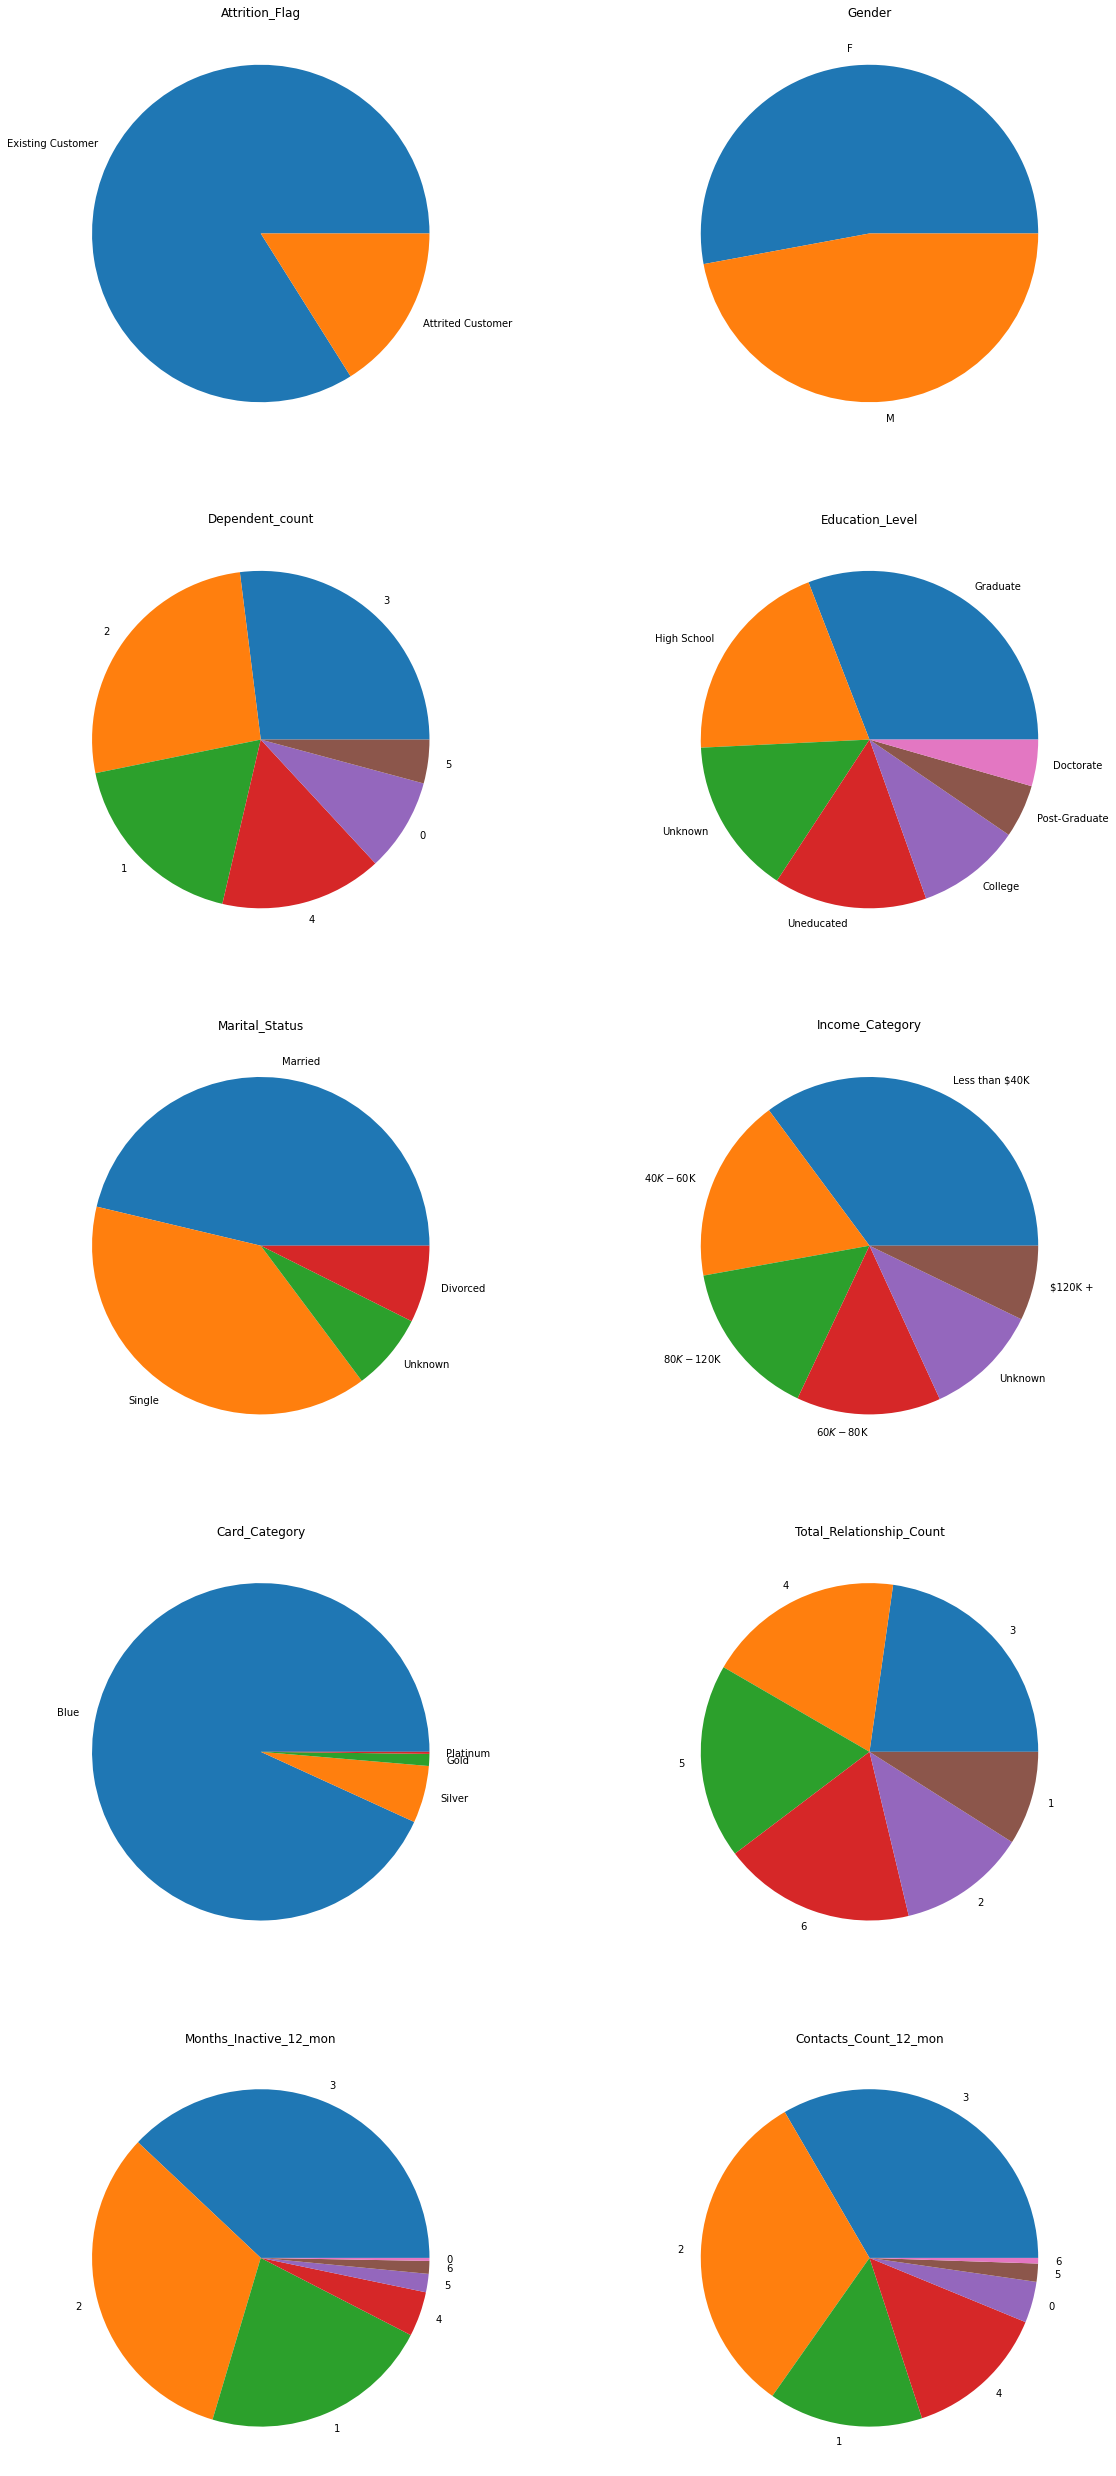

In [117]:
fig, axs = plt.subplots(5, 2, figsize=(20, 45))
axes = [item for sublist in axs for item in sublist]
j = 0

for i in (1, 3, 4, 5, 6, 7, 8, 10, 11, 12):
    d = dict(data[data.columns[i]].value_counts())
    axes[j].pie(d.values(), labels=d.keys())
    axes[j].set_title(data.columns[i])
    j += 1

plt.show()

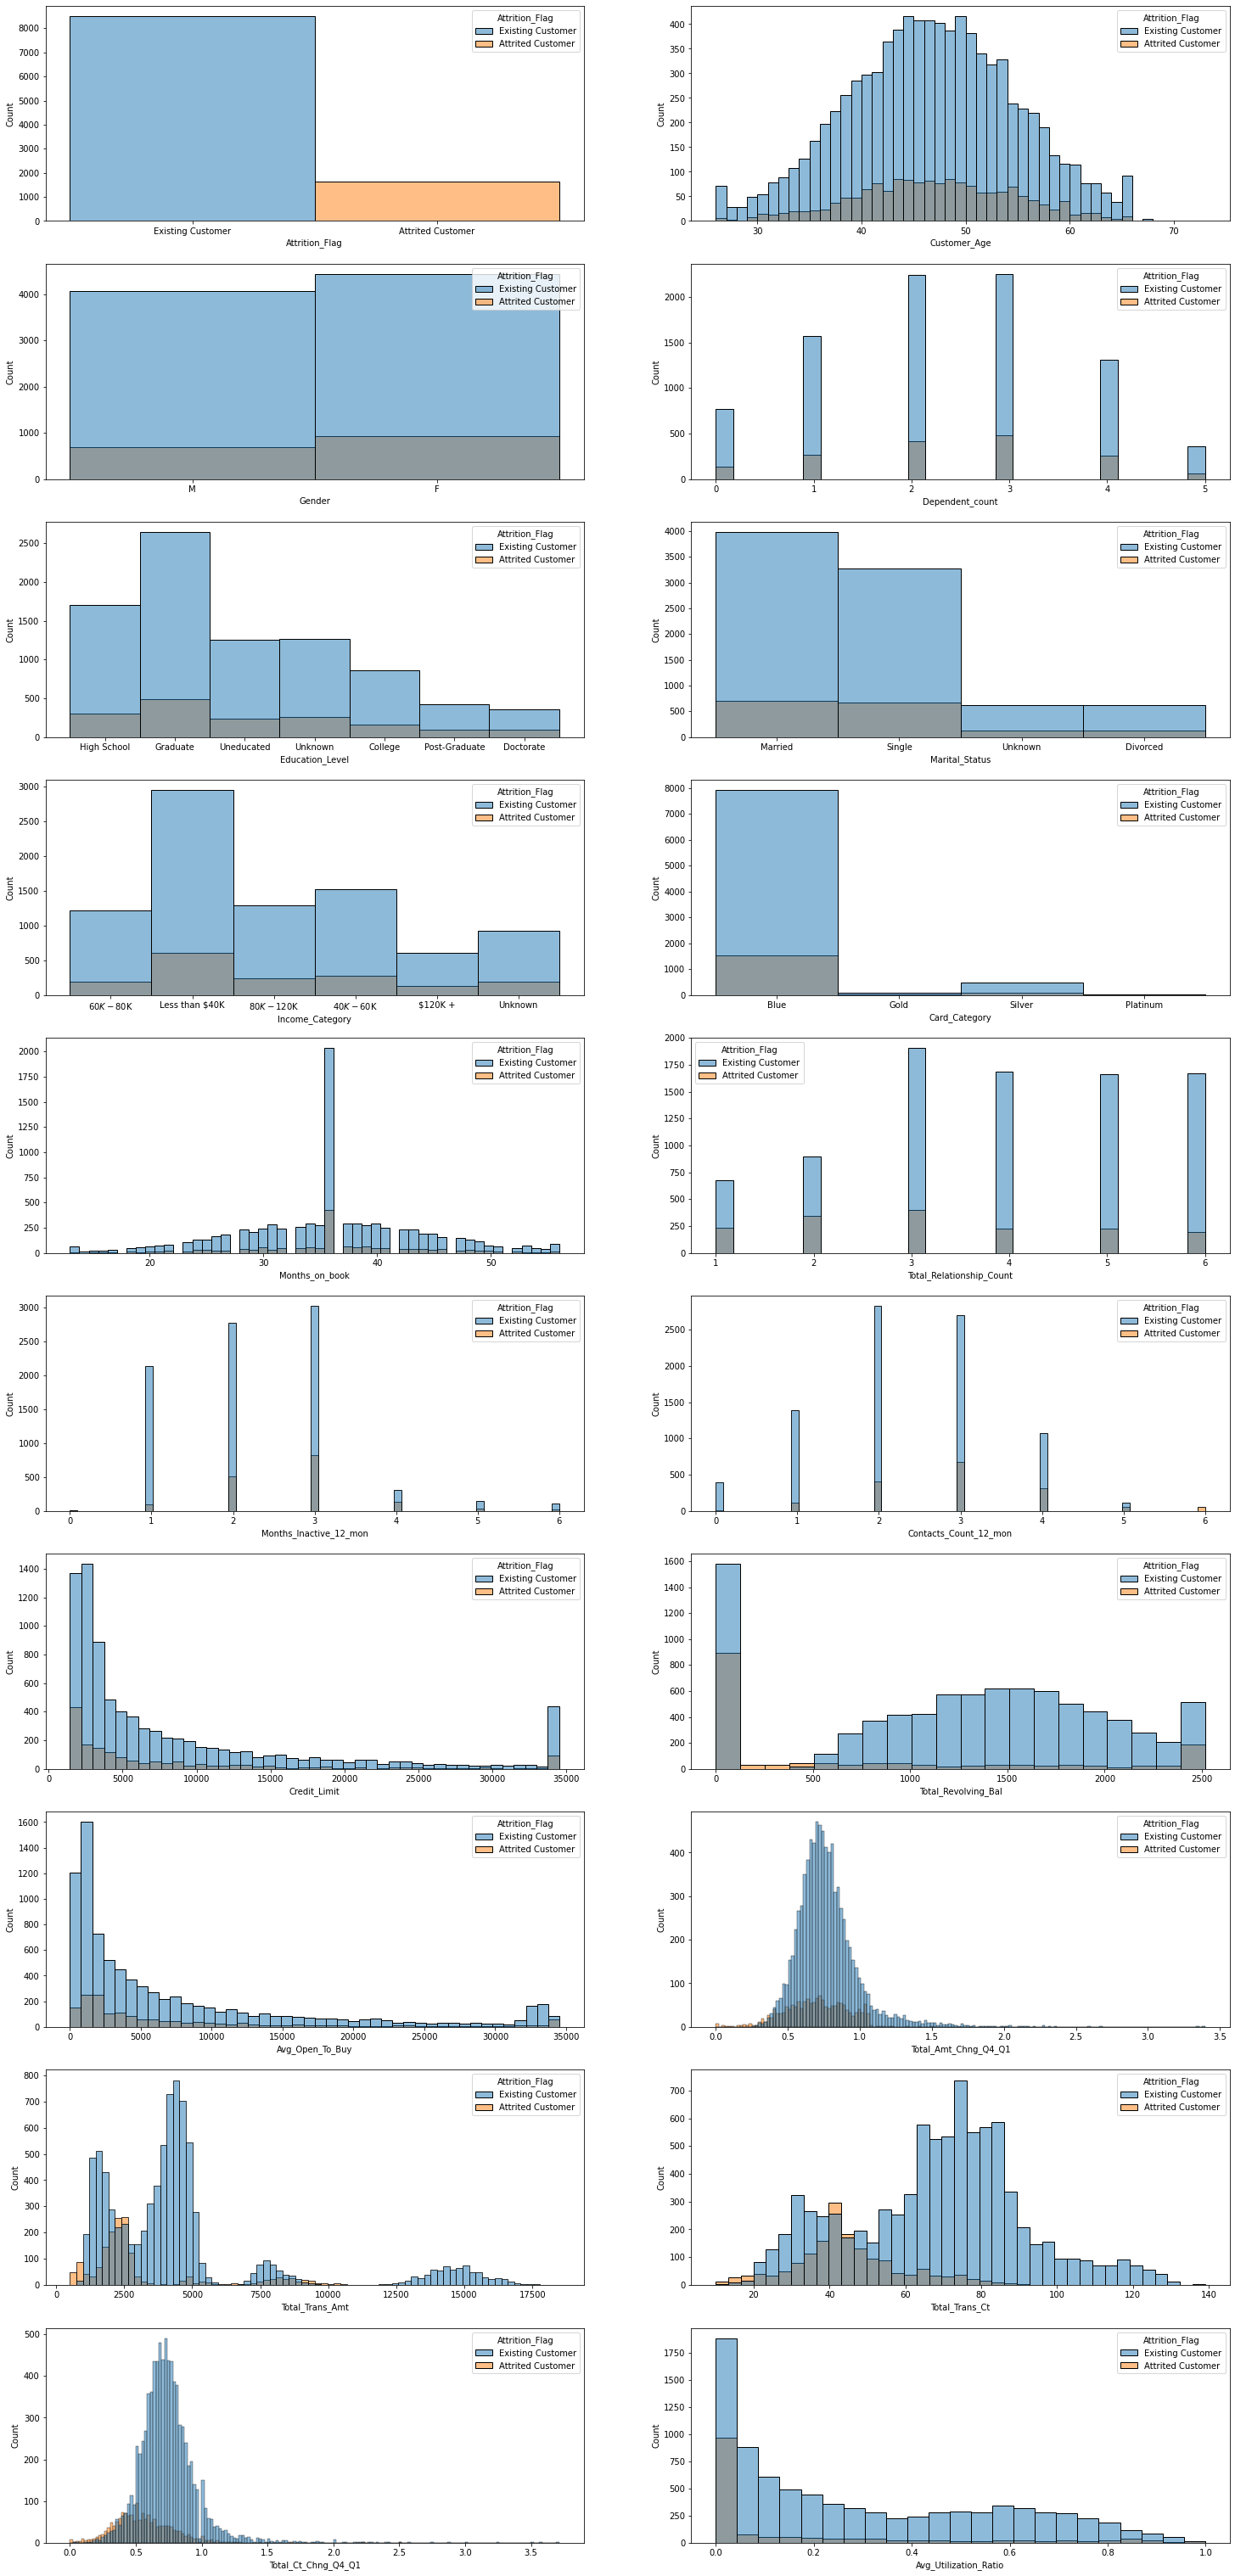

In [118]:
fig, axs = plt.subplots(10, 2, figsize=(25, 55))
axes = [item for sublist in axs for item in sublist]

for i, feature in enumerate(data.columns[1:21]):
    sns.histplot(data=data, x=feature, hue=ATTRITION_FLAG, ax=axes[i])

plt.show()

# Identify data types and values

Numeric:

In [119]:
for i in (0, 2, 9) + tuple(range(13, 23)):
    print(data.columns[i])

CLIENTNUM
Customer_Age
Months_on_book
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


Categorical:

In [120]:
for i in (1, 3, 6):
    print(data.columns[i])

Attrition_Flag
Gender
Marital_Status


Ordinal:

In [121]:
for i in (4, 5, 7, 8, 10, 11, 12):
    print(data.columns[i])

Dependent_count
Education_Level
Income_Category
Card_Category
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon


# Calculate statistics

Mean:

In [122]:
for i in (2, 4) + tuple(range(9, 23)):
    print(f'{data.columns[i]:<24}  {data[data.columns[i]].mean()}')

Customer_Age              46.32596030413745
Dependent_count           2.3462032191172115
Months_on_book            35.928409203120374
Total_Relationship_Count  3.8125802310654686
Months_Inactive_12_mon    2.3411671768539546
Contacts_Count_12_mon     2.4553174681544387
Credit_Limit              8631.953698034848
Total_Revolving_Bal       1162.8140614199665
Avg_Open_To_Buy           7469.139636614887
Total_Amt_Chng_Q4_Q1      0.7599406536980376
Total_Trans_Amt           4404.086303939963
Total_Trans_Ct            64.85869457884863
Total_Ct_Chng_Q4_Q1       0.7122223758269962
Avg_Utilization_Ratio     0.2748935518909845
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  0.1599974639787803
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  0.8400025708403275


Standard deviation:

In [123]:
for i in (2, 4) + tuple(range(9, 23)):
    print(f'{data.columns[i]:<24}  {data[data.columns[i]].std()}')

Customer_Age              8.016814032549084
Dependent_count           1.2989083489037916
Months_on_book            7.986416330871776
Total_Relationship_Count  1.5544078653388382
Months_Inactive_12_mon    1.0106223994182562
Contacts_Count_12_mon     1.1062251426358938
Credit_Limit              9088.776650223113
Total_Revolving_Bal       814.9873352357697
Avg_Open_To_Buy           9090.685323679128
Total_Amt_Chng_Q4_Q1      0.21920676923070248
Total_Trans_Amt           3397.129253557085
Total_Trans_Ct            23.472570449233046
Total_Ct_Chng_Q4_Q1       0.23808609133294173
Avg_Utilization_Ratio     0.2756914692523933
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  0.3653010123804704
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  0.3653010371101796


Correlation matrix:

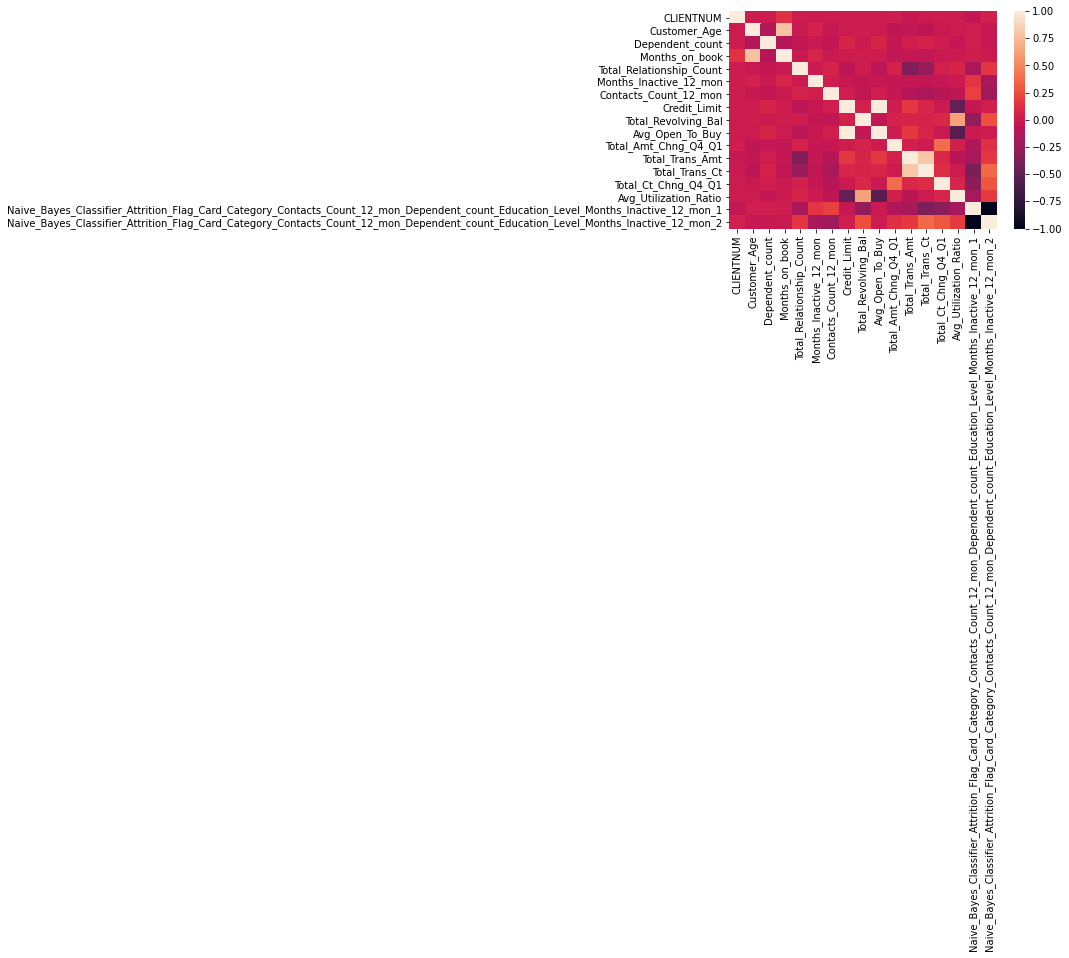

In [124]:
sns.heatmap(data.corr())

Frequency:

In [125]:
for i in (1, 3, 4, 5, 6, 7, 8, 10, 11, 12):
    print(data[data.columns[i]].value_counts(), '\n')

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64 

F    5358
M    4769
Name: Gender, dtype: int64 

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64 

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64 

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64 

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64 

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64 

3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64 

3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Mont

# Check the correspondence of plots and statistical values

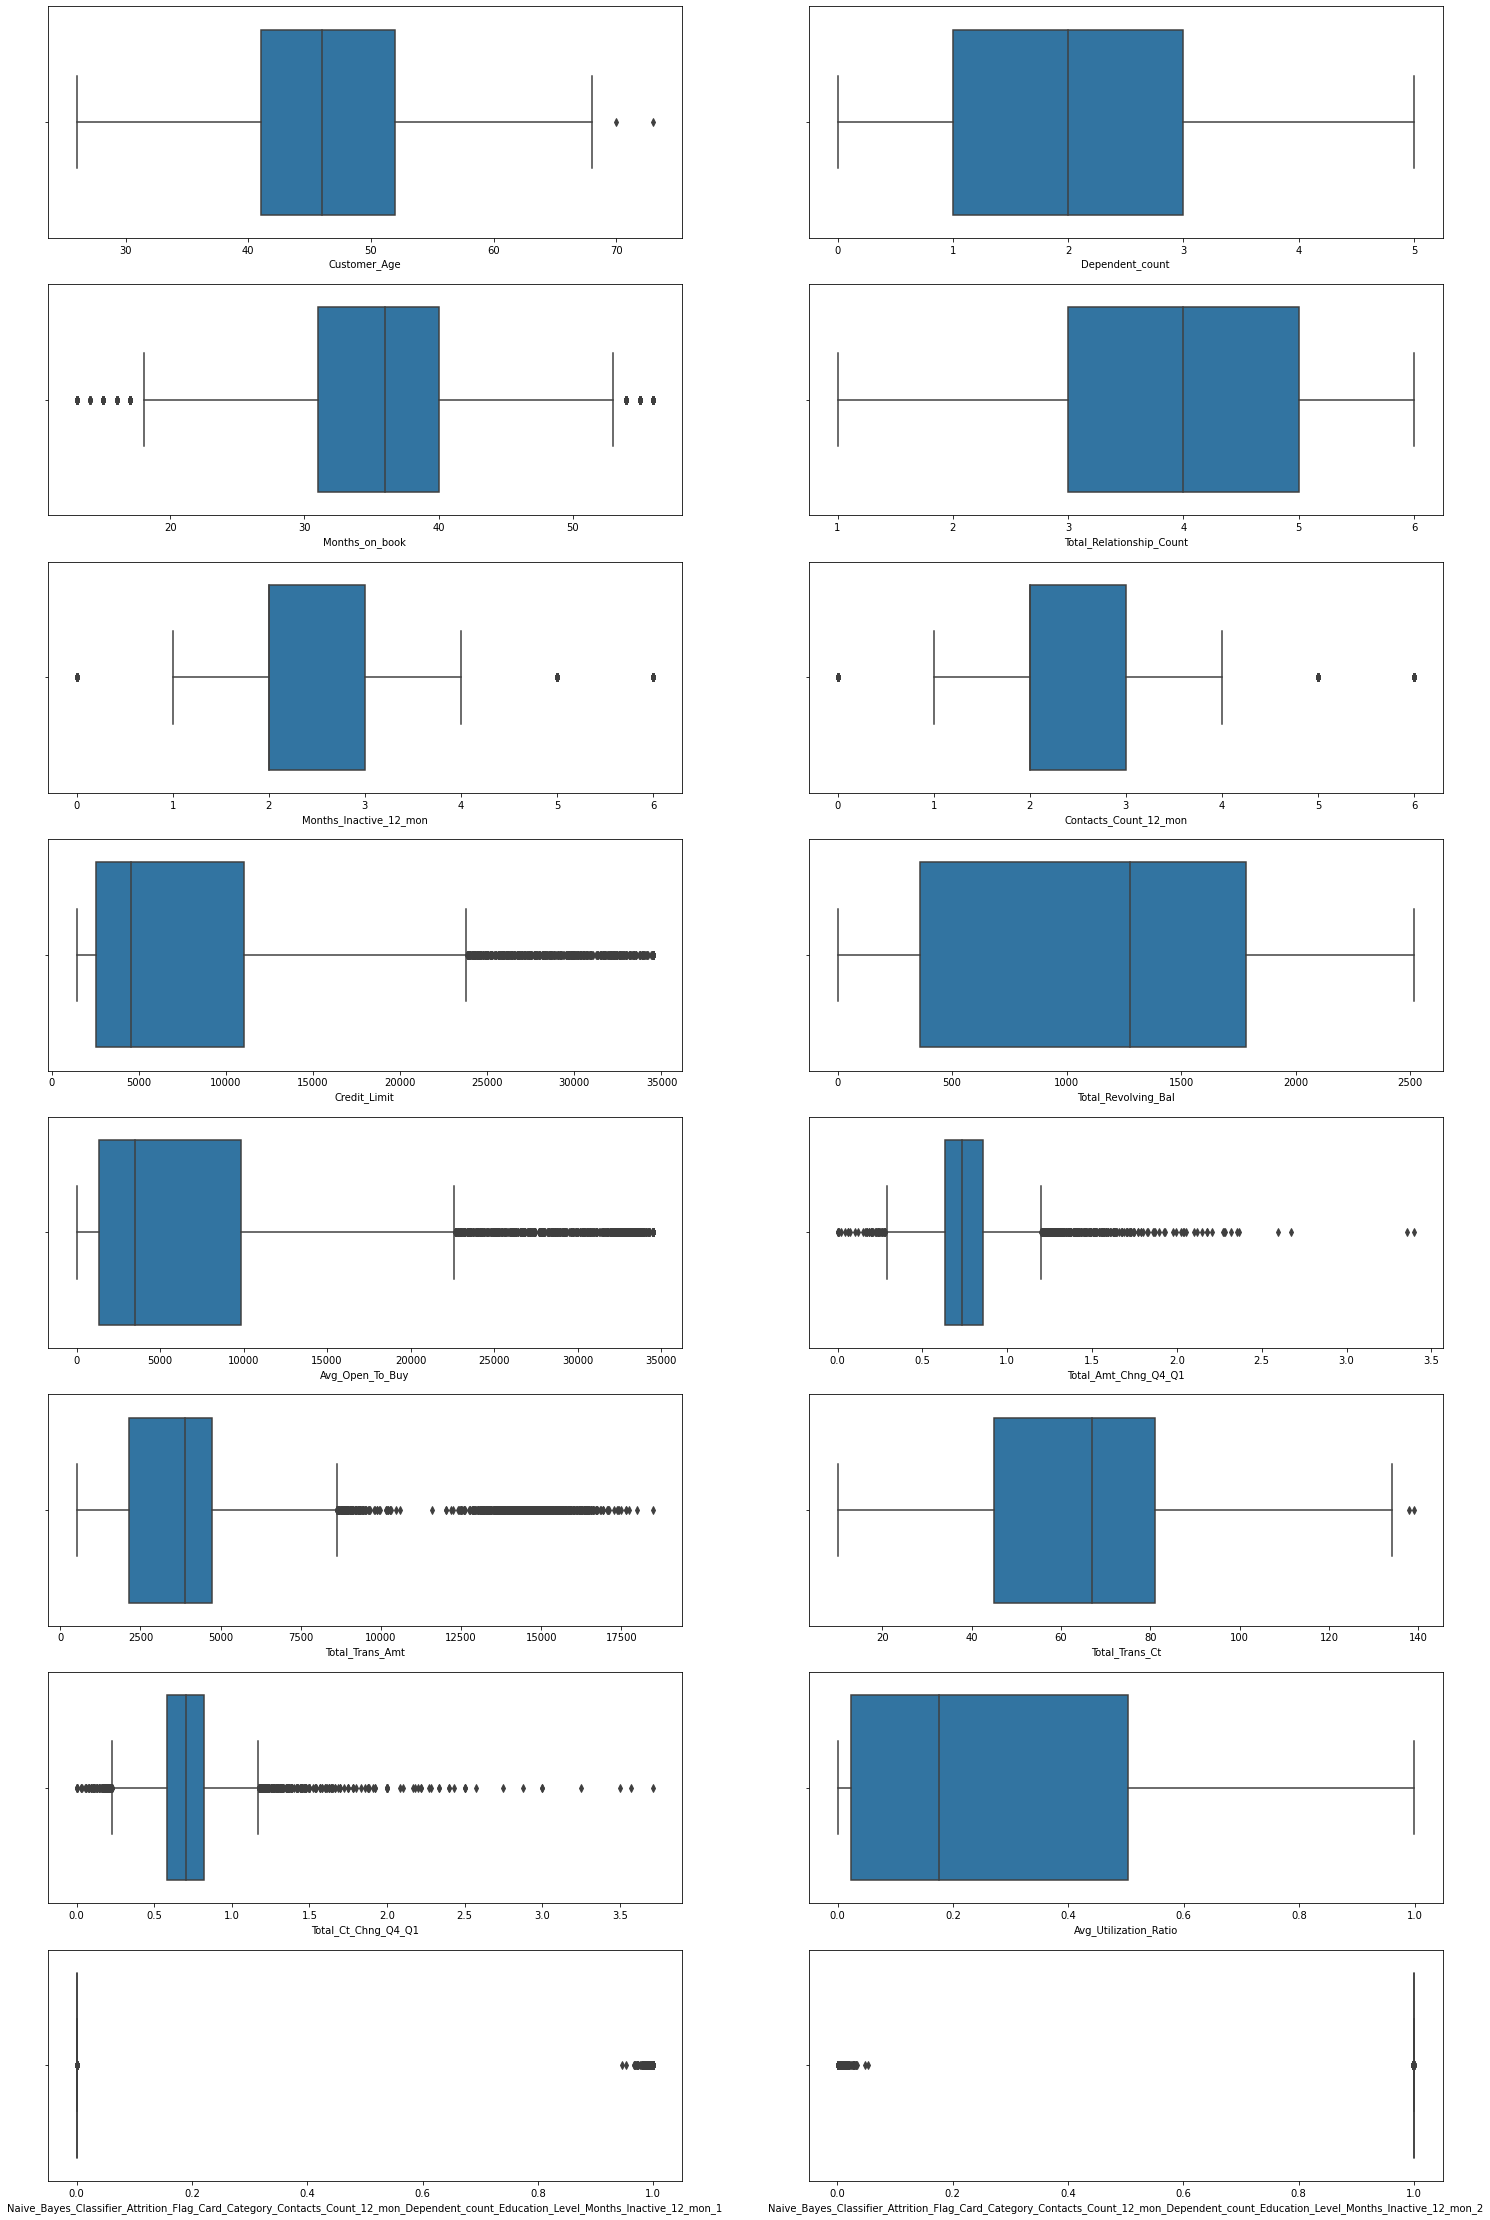

In [126]:
fig, axs = plt.subplots(8, 2, figsize=(25, 40))
axes = [item for sublist in axs for item in sublist]
j = 0

for i in (2, 4) + tuple(range(9, 23)):
    sns.boxplot(data=data, x=data.columns[i], ax=axes[j])
    j += 1

plt.show()